In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import os


In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df_new=df[['reading score','writing score']]
print(df_new.head())

   reading score  writing score
0             72             74
1             90             88
2             95             93
3             57             44
4             78             75


In [4]:
corr=df_new.corr()
print(corr)

               reading score  writing score
reading score       1.000000       0.954598
writing score       0.954598       1.000000


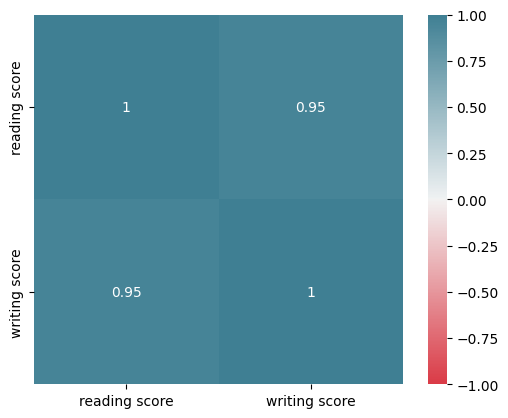

In [5]:
#visual view
import seaborn as sns
import matplotlib.pyplot as plt

cmap=sns.diverging_palette(10,220, as_cmap=True)
sns.heatmap(corr, vmin=-1.0, vmax=1.0, square=True , cmap=cmap, annot=True)
plt.show()

In [6]:
correlation_coe = df_new['reading score'].corr(df_new['writing score'])
correlation_coe

0.9545980771462479

0       2
1      -2
2      -2
3     -13
4      -3
       ..
995    -4
996     0
997    -6
998    -1
999     0
Length: 1000, dtype: int64


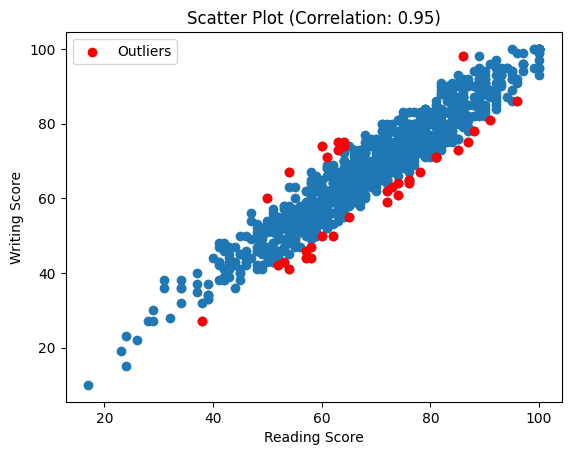

In [7]:
plt.scatter(df_new['reading score'], df_new['writing score'])
plt.xlabel("Reading Score")
plt.ylabel('Writing Score')
plt.title(f'Scatter Plot (Correlation: {correlation_coe:.2f})')
residual = df_new['writing score'] - df_new['reading score']
print(residual)
std_devi = residual.std()
outliers = df[abs(residual) > 2 * std_devi]
plt.scatter(outliers['reading score'], outliers['writing score'], color = 'red', label = 'Outliers')
plt.legend()
plt.show()